# History

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. The executive team has asked me to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.

# Summary

3 things about the data

In [1]:


#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#read in data
mouse_data=pd.read_csv("./Resources/Mouse_metadata.csv")
study_results=pd.read_csv("./Resources/study_results.csv")

#merge the two data sets on mouse ID
merged_study=pd.DataFrame.merge(mouse_data,study_results, how='outer',on="Mouse ID")
merged_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#look for duplicates on Mouse ID and Timepoint
duplicates=merged_study.loc[pd.DataFrame.duplicated(merged_study,subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [3]:
duplicate_entries_df=merged_study.loc[merged_study["Mouse ID"] == "g989"]
duplicate_entries_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
#cleaning for duplicates on Mouse ID and Timepoint
clean_study_results=merged_study[merged_study['Mouse ID'].isin(duplicates)==False]
clean_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#Create a summary statistics table consisting of the 
#mean, median, variance, standard deviation, and SEM of the Tumor Volume for each drug regimen
avgs=clean_study_results.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
medians=clean_study_results.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variances=clean_study_results.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
standard_devs=clean_study_results.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
SEMs=clean_study_results.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

stat_summary_table= pd.DataFrame({"Avg. Tumor Volume":avgs,
                                "Median Tumor Volume":medians,
                                "Variance":variances,
                                "Standard Deviation":standard_devs,
                                "Standard Error": SEMs})
stat_summary_table

,Avg. Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


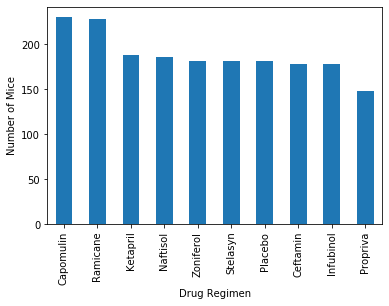

In [6]:
#Create a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows 
#the number of total mice for each treatment regimen throughout the course of the study

small=clean_study_results['Drug Regimen'].value_counts()
small.plot(x='Drug Regimen',y='Number of Mice',kind='bar',figsize=(6,4))
pd.DataFrame.plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()


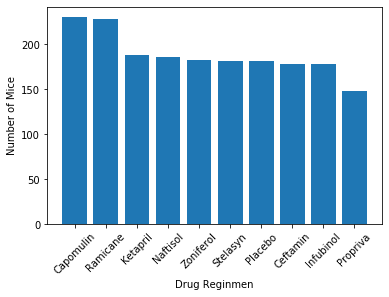

In [7]:
#matplotlib version
plt.bar(small.index.values,small.values)
plt.xlabel('Drug Reginmen')
plt.ylabel('Number of Mice')
plt.xticks(rotation=45)
plt.show()

C:\Users\annel\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


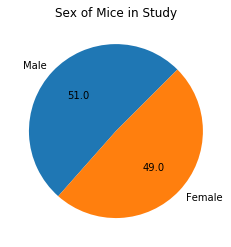

In [8]:
# Create a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the distribution of female or male mice in the study
pie_data=clean_study_results['Sex'].value_counts()
pie_data.plot(kind='pie',autopct='%.1f',startangle=45)
plt.axes().set_ylabel('')
plt.title('Sex of Mice in Study')
plt.show()
#plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

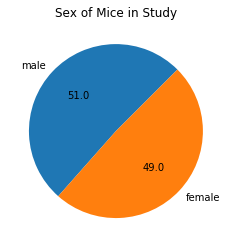

In [9]:
#matplotlib version
plt.pie(pie_data, labels=['male','female'],autopct='%.1f',startangle=45)
plt.title('Sex of Mice in Study')
plt.show()

In [10]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. 

#timepoints are different for different specimen, so get biggest for each one
big_tumor=clean_study_results.groupby(['Mouse ID'])['Timepoint'].max()
#index looks funky. reset
big_tumor=big_tumor.reset_index()
#need the big tumor data as a column on the rest of the data
merge_big=big_tumor.merge(clean_study_results,on=['Mouse ID','Timepoint'],how='left')
merge_big

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [11]:
#list of max tumors for scatter plot
tumor_max_vol_list=[]
#list of the drugs I'm supposed to look at
promising_drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


In [12]:
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
for drug in promising_drugs:
    final_tumor_vol=merge_big.loc[merge_big['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    tumor_max_vol_list.append(final_tumor_vol)
    quartiles=final_tumor_vol.quantile(q=[.25,.5,.75])
    lowerq=quartiles[.25]
    higherq=quartiles[.75]
    iqr=higherq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    higher_bound=higherq+(1.5*iqr)
    outliers=final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > higher_bound)]
    print(f"{drug} outliers: {outliers}")

Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [13]:
#plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

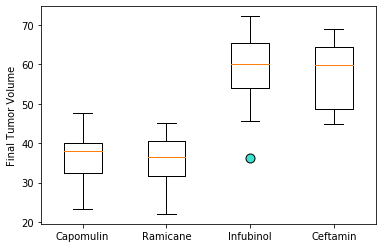

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#and highlight any potential outliers in the plot by changing their color and style.
# All four box plots should be within the same figure. 
outlier_highlight=dict(markerfacecolor='turquoise',markersize=9)
plt.boxplot(tumor_max_vol_list, labels=promising_drugs, flierprops=outlier_highlight)
plt.ylabel('Final Tumor Volume')
plt.show()

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#select a random mouse that received capomulin treatment
capomulin_only=clean_study_results.loc[clean_study_results["Drug Regimen"] == "Capomulin"]
#random_mouse = capomulin_only.sample(n=1)
#mouse_id=random_mouse['Mouse ID']
#mouse_id

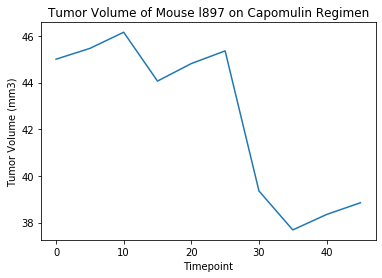

In [21]:
#create the line plot of mouse b742's tumor vol over time.
capo_mouse=capomulin_only.loc[capomulin_only['Mouse ID']=="l897"]
plt.plot(capo_mouse['Timepoint'],capo_mouse['Tumor Volume (mm3)'])
plt.title(f"Tumor Volume of Mouse l897 on Capomulin Regimen")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


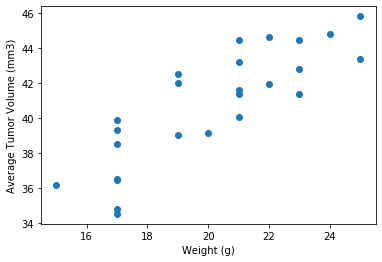

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = clean_study_results.loc[clean_study_results['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()

#Calculate the correlation coefficient and linear regression model between mouse weight 
#and average tumor volume for the Capomulin treatment. 
correlation=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

